# Estimating π using Monte Carlo
Given 1 unit x 1 unit square, the radius of a circle is 0.5 unit, area of the circle is π/4

In [1]:
import math
import numpy as np
from scipy.stats import qmc
import matplotlib.pyplot as plt

In [2]:
# generate random samples using Sobol sequence
def simulate(dimension, power):
    simulation = qmc.Sobol(d = dimension, scramble = False)
    simulation = simulation.random_base2(m = power)
    simulation = np.delete(simulation, 0, axis = 0)
    print(f'{dimension} X {2 ** power:,} simulations generated')

    return simulation

# computing distance from center using pythagoras theorem
def distance_from_center(x, y, radius):
    a = (x - radius) ** 2
    b = (y - radius) ** 2
    c = np.sqrt(a + b)

    return c

# counting the number of points that are within the unit circle
def in_circle(x, y, radius):
    
    distance = distance_from_center(x, y, radius)
    inside = np.where(distance < radius, 1, 0)
    coord = np.array([x, y, inside])

    return inside, coord

# compute pi using area of circle
def compute_pi(inside, total_n):

    return inside / total_n * 4

In [3]:
dimension, power, radius = 2, 15, 0.5

total_n = 2 ** power

simulation = simulate(dimension, power)

x, y = simulation.T[0], simulation.T[1]

inside, coord = in_circle(x, y, radius)

pi = compute_pi(inside.sum(), total_n)

print(f'The Estimated Value Of π Is {pi}')
print(f'The Value Of π Is {math.pi}')

2 X 32,768 simulations generated
The Estimated Value Of π Is 3.141357421875
The Value Of π Is 3.141592653589793


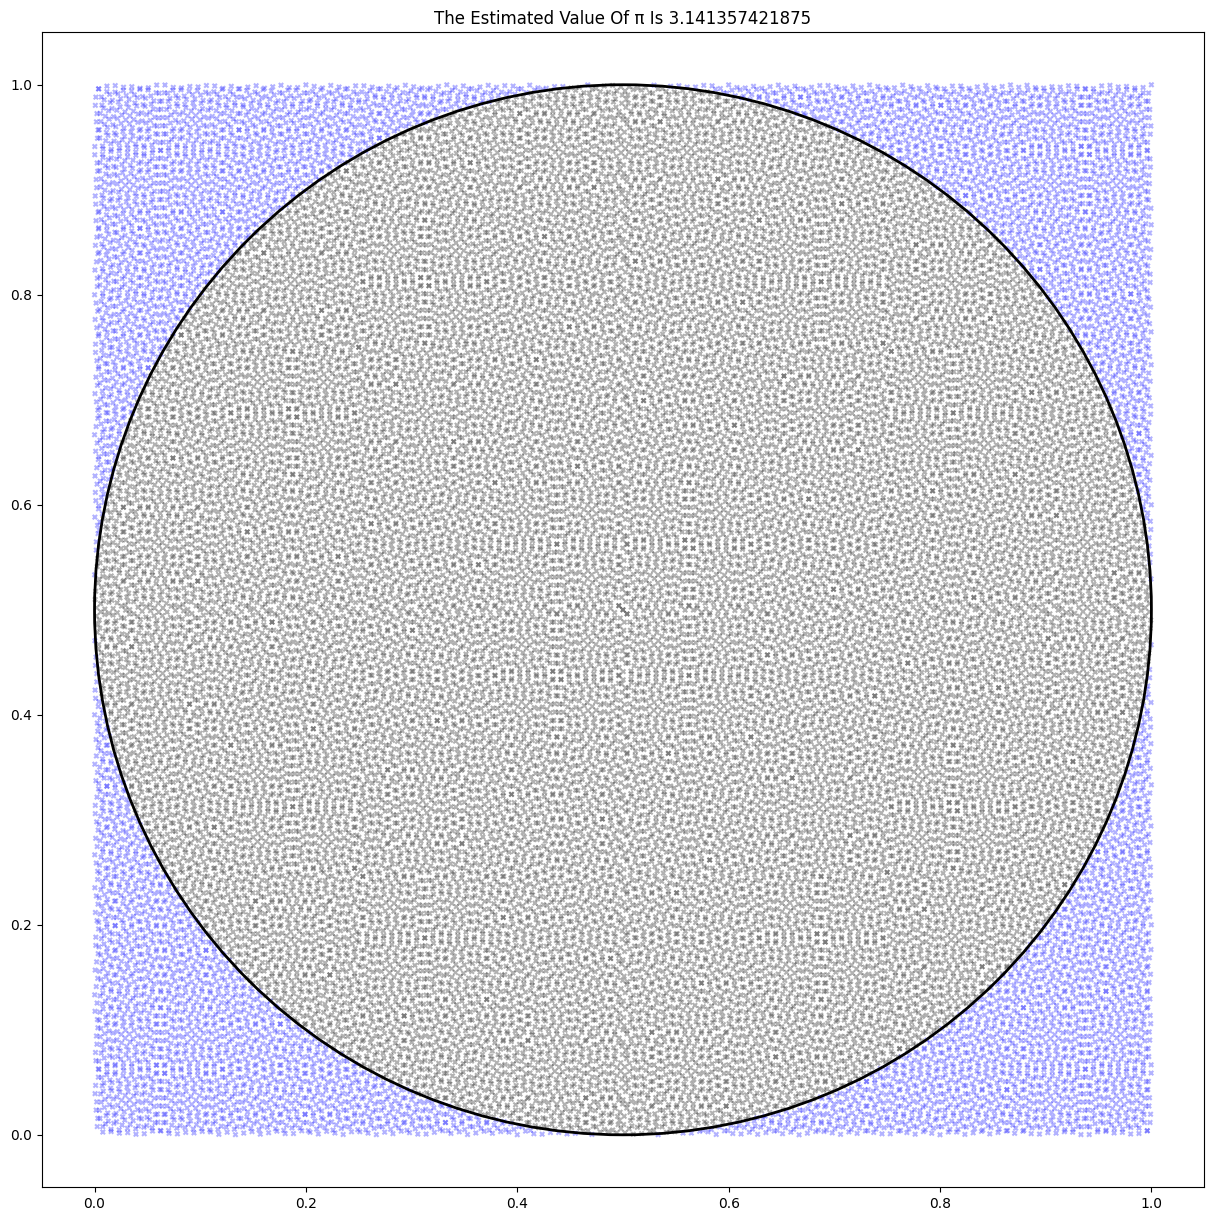

In [4]:
figure, axes = plt.subplots(figsize = (15,15))

radius, center = 0.5, (0.5, 0.5)

circle_plot = plt.Circle(center, radius, fill = False, linewidth = 2)

axes.set_title(f'The Estimated Value Of π Is {pi}')
col = np.where(coord[2] == 1,'k','b')
axes.scatter(coord[0], coord[1], color = col, alpha = 0.3, marker = 'x', s = 10)
axes.add_artist(circle_plot);